In [1]:
import yfinance as yf

import numpy as np
import matplotlib.pylab as plt

import pandas as pd

import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import t, norm, stats

In [2]:
!pip install yfinance --upgrade

In [3]:
ticker = "^GSPC"

In [4]:
index_data = yf.download(ticker, start = "2000-01-01", end = "2025-05-01", auto_adjust = True, interval = "1mo")

[*********************100%***********************]  1 of 1 completed


In [5]:
index_data

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2000-01-01,1394.459961,1478.000000,1350.140015,1469.250000,21494400000
2000-02-01,1366.420044,1444.550049,1325.069946,1394.459961,20912000000
2000-03-01,1498.579956,1552.869995,1346.619995,1366.420044,26156200000
2000-04-01,1452.430054,1527.189941,1339.400024,1498.579956,20106460000
2000-05-01,1420.599976,1481.510010,1361.089966,1452.430054,19898300000
...,...,...,...,...,...
2024-12-01,5881.629883,6099.970215,5832.299805,6040.109863,86064900000
2025-01-01,6040.529785,6128.180176,5773.310059,5903.259766,88639380000


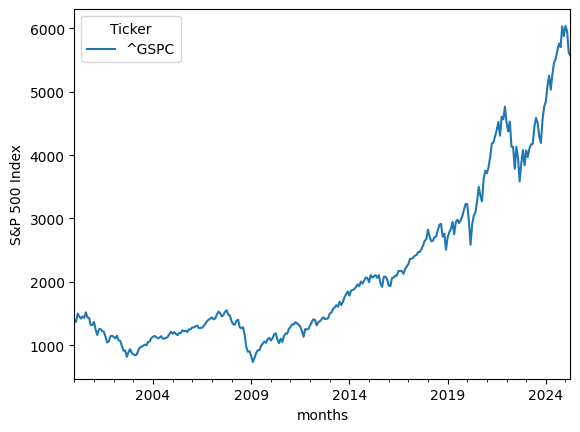

In [6]:
index_data['Close'].plot()
plt.xlabel("months")
plt.ylabel("S&P 500 Index")
plt.show()

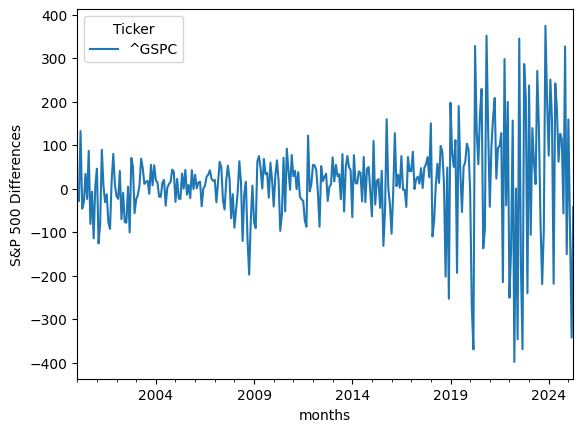

In [7]:
index_data['Close'].diff().plot()
plt.xlabel("months")
plt.ylabel("S&P 500 Differences")
plt.show()

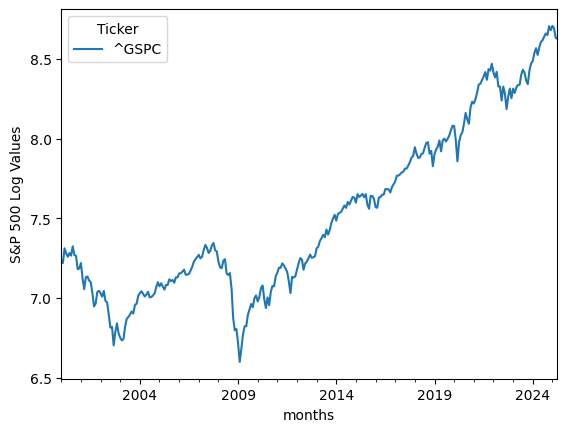

In [8]:
np.log(index_data['Close']).plot()
plt.xlabel("months")
plt.ylabel("S&P 500 Log Values")
plt.show()

In [9]:
#index_data['Log Return'] = np.log(index_data['Close']/index_data['Close'].shift(1))
index_data['Log Return'] = np.log(index_data['Close']).diff()

In [10]:
index_data

Price,Close,High,Low,Open,Volume,Log Return
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2000-01-01,1394.459961,1478.000000,1350.140015,1469.250000,21494400000,NaN
2000-02-01,1366.420044,1444.550049,1325.069946,1394.459961,20912000000,-0.020313
2000-03-01,1498.579956,1552.869995,1346.619995,1366.420044,26156200000,0.092324
2000-04-01,1452.430054,1527.189941,1339.400024,1498.579956,20106460000,-0.031280
2000-05-01,1420.599976,1481.510010,1361.089966,1452.430054,19898300000,-0.022159
...,...,...,...,...,...,...
2024-12-01,5881.629883,6099.970215,5832.299805,6040.109863,86064900000,-0.025308
2025-01-01,6040.529785,6128.180176,5773.310059,5903.259766,88639380000,0.026658


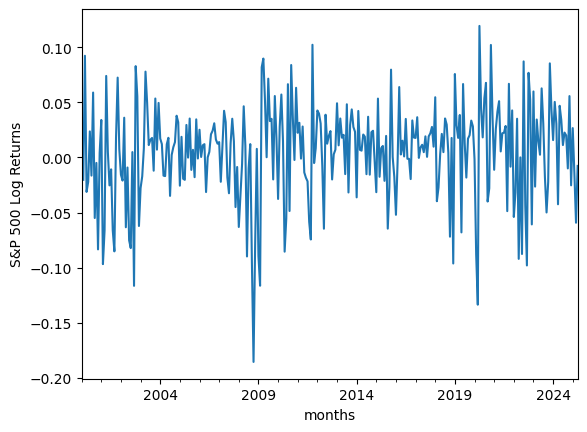

In [11]:
index_data['Log Return'].plot()
plt.xlabel("months")
plt.ylabel("S&P 500 Log Returns")
plt.show()

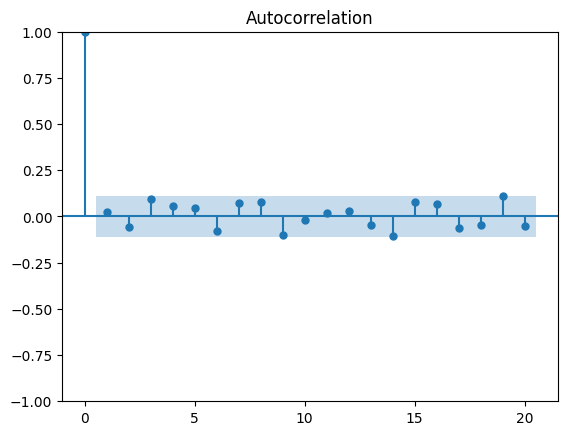

In [12]:
plot_acf(index_data['Log Return'][1:], alpha = 0.05, bartlett_confint = False, lags=20)
plt.show()

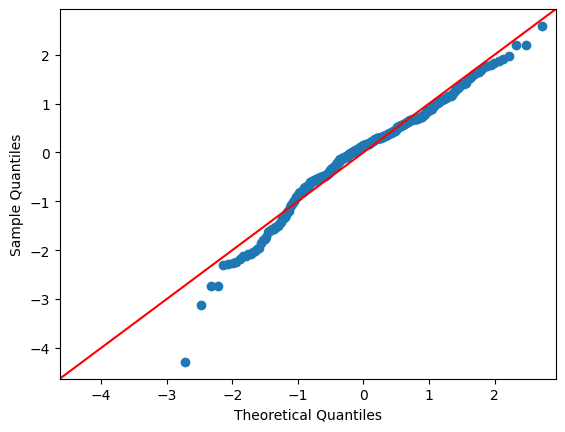

In [13]:
sm.qqplot((index_data['Log Return'][1:]-index_data['Log Return'][1:].mean())/index_data['Log Return'][1:].std(), line = "45")
plt.show()

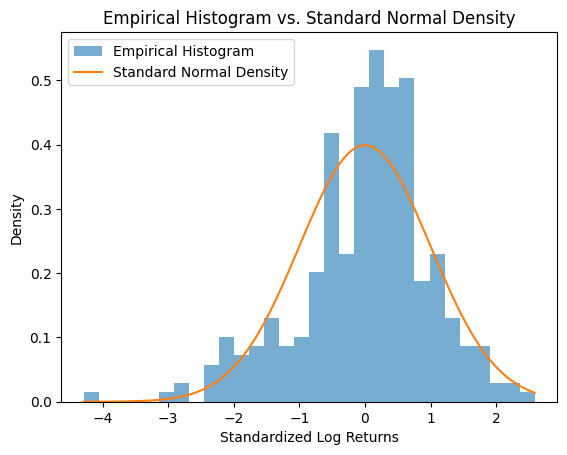

In [15]:
# prompt: I want to plot the empirical histogram of the standardized "index_data" and compare it with the density of the standard normal distribution.

# Assuming index_data['Log Return'][1:] is already standardized
standardized_returns = (index_data['Log Return'][1:] - index_data['Log Return'][1:].mean()) / index_data['Log Return'][1:].std()

# Plot the empirical histogram
plt.hist(standardized_returns, bins=30, density=True, alpha=0.6, label='Empirical Histogram')

# Generate x values for the standard normal density
x = np.linspace(standardized_returns.min(), standardized_returns.max(), 100)

# Plot the standard normal density
plt.plot(x, norm.pdf(x), label='Standard Normal Density')

plt.xlabel('Standardized Log Returns')
plt.ylabel('Density')
plt.title('Empirical Histogram vs. Standard Normal Density')
plt.legend()
plt.show()
